# 신경망 알고리즘 활용 실무적 텍스트 분류 

- Object : Label 붙어있는 문서(company_train_data.csv)를 사전에 가져와서, 학습 모델을 구축한 다음 문서 분류가 되어있지 않은 (company_test_data.csv) 문서분류 작업 실시 

In [48]:
# 데이터 처리 
import pandas as pd 
import numpy as np
# 시각화 
import seaborn as sns 
import matplotlib as mpl
import matplotlib.pyplot as plt 
# 시각화 옵션
from IPython.display import set_matplotlib_formats
# 한글 글꼴 설정
mpl.rc('font',family ='Malgun Gothic')
# 음수값 설정 
mpl.rc('axes',unicode_minus= True )
# 그래프 선명하게 출력
set_matplotlib_formats('retina')

In [49]:
df1 = pd.read_csv('company_Train_data.csv')
print(df1.shape)
df1.head()

(304, 3)


,Unnamed: 0,한줄평,기업성장여부
0,0,"1. 내부구성원들을 위하는 기업문화가 형성되어있고, 실제로 운영측면에서도 배려마인드...",성장
1,1,"그 누구의 눈치도 보지 않으며, 자유로운 의사소통에 내부 분위기, 팀별로 케바케 이...",성장
2,2,"도서구입비 무제한 지원, 주 35시간 근무, 월요일은 오후1시 출근,",성장
3,3,자율적인 분위기와 좋은 복지를 많이 갖춘 곳. 좋은 사람들이 많이 모여있고 그 안에...,성장
4,4,"1. 내부구성원들을 위하는 기업문화가 형성되어있고, 실제로 운영측면에서도 배려마인드...",성장


In [50]:
df1['기업성장여부'].value_counts()

정체    152
성장    152
Name: 기업성장여부, dtype: int64

In [51]:
# Encoding (범주형 데이터를 숫자로 변환)
df1['Target'] = df1['기업성장여부'].replace({'성장':1,'정체':0})

In [52]:
X_train = df1['한줄평']
Y_train = df1['Target']

- 불용어 및 특수문자 처리

In [53]:
from konlpy.tag import Okt
import re 

In [54]:
df_stopword  = pd.read_csv('stopword.txt',header=None, names=['불용어'])
stopword_set = set(df_stopword['불용어'].values.tolist())

In [55]:
# 불용어 및 특수 기호 처리함수 구성 
def stopword_function(X): # Series 형태로 Input 
    clean_train_review = []
    okt = Okt()
    # 모든 X 값에 대해 불용어 및 특수기호 처리 
    for i in X:

        # 문자데이터에 대한 불용어 처리 
        if type(i) == str:
            # 특수 문자 처리 
            review_text = re.sub("[!1(+.),.@@\/n2345']?","",i) 
            # Tokenizing & Stemming 
            word_text = okt.morphs(review_text,stem=True)
            # StopWord 
            word_text = [token for token in word_text if not token in stopword_set]  

            clean_train_review.append(word_text)

        # 숫자데이터가 오는 경우, 공백을 append     
        else:
            clean_train_review.append([])
            
    return clean_train_review

In [56]:
X_train_clean = stopword_function(X_train)

- Text to  Sequence / Padding 

In [57]:
X_length = X_train.apply(len)
X_length.describe()

count    304.000000
mean      72.878289
std       51.277749
min       23.000000
25%       41.750000
50%       55.000000
75%       89.000000
max      455.000000
Name: 한줄평, dtype: float64

In [58]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [59]:
model_token = Tokenizer()
model_token.fit_on_texts(X_train_clean)

In [60]:
# Embedding Layer 구성 작업, Input Unit  
len(model_token.word_index)

1540

In [61]:
X_sequence = model_token.texts_to_sequences(X_train_clean)

max_length = 60 
X_input    = pad_sequences(X_sequence, maxlen=max_length, padding='post')

# 순환 신경망 알고리즘 

- Recurrent Nerual Network (RNN) : 
    - 현재까지 처리한 정보 상태(State)를 저장하여 앞/뒤 정보를 유지하면서 학습 (순환연결)
    - 순서를 갖는 Sequence 데이터를 처리 한다. 

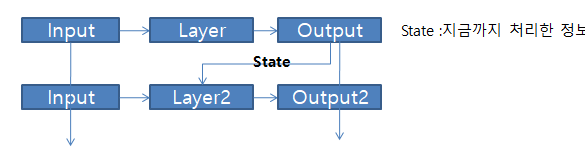

In [62]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras        import layers
from tensorflow.keras.optimizers import RMSprop, SGD
from tensorflow.keras.utils  import to_categorical

In [63]:
tensorflow.__version__

'2.5.0'

In [64]:
# Random Seed 
tensorflow.random.set_seed(1000)

In [65]:
# Y 값을 Matrix 형태로 변환
Y_matrix = to_categorical(Y_train.astype(int))
Y_matrix

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.

- Sequential() : 신경망 모델 구성 
- layers.Embedding() : X 데이터를 Vector 변환 
    - Embedding(Vocabulary Size, Output Vector, Input length)
- layers.SimpleRNN() : RNN Layer 구성 
    - SimpleRNN(input Vector)
- layers.Dense() : Layer 구성  
    - Dense(unit)

- Simple RNN Model 

In [66]:
# Model 
model_rnn = Sequential()
model_rnn.add(layers.Embedding(1600, 32, input_length = max_length))
model_rnn.add(layers.SimpleRNN(32))
model_rnn.add(layers.Dense(2, activation='sigmoid'))

model_rnn.summary()

model_rnn.compile(optimizer='rmsprop', loss='binary_crossentropy',metrics=['acc'])

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 60, 32)            51200     
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 66        
Total params: 53,346
Trainable params: 53,346
Non-trainable params: 0
_________________________________________________________________


In [67]:
history = model_rnn.fit(X_input, Y_matrix, 
                        epochs=120, batch_size=32, validation_split=0.2)

Epoch 1/120
8/8 [==============================] - 2s 170ms/step - loss: 0.6752 - acc: 0.6296 - val_loss: 0.9238 - val_acc: 0.0164
Epoch 2/120
8/8 [==============================] - 1s 130ms/step - loss: 0.6232 - acc: 0.6502 - val_loss: 0.7021 - val_acc: 0.6230
Epoch 3/120
8/8 [==============================] - 1s 130ms/step - loss: 0.5011 - acc: 0.8683 - val_loss: 0.6323 - val_acc: 0.7049
Epoch 4/120
8/8 [==============================] - 1s 125ms/step - loss: 0.4770 - acc: 0.8107 - val_loss: 0.8564 - val_acc: 0.5082
Epoch 5/120
8/8 [==============================] - 1s 129ms/step - loss: 0.3259 - acc: 0.9506 - val_loss: 0.6311 - val_acc: 0.7541
Epoch 6/120
8/8 [==============================] - 1s 124ms/step - loss: 0.2545 - acc: 0.9712 - val_loss: 0.7044 - val_acc: 0.6721
Epoch 7/120
8/8 [==============================] - 1s 127ms/step - loss: 0.3654 - acc: 0.8889 - val_loss: 0.6212 - val_acc: 0.7213
Epoch 8/120
8/8 [==============================] - 1s 125ms/step - loss: 0.1819 - a

8/8 [==============================] - 1s 129ms/step - loss: 9.0119e-04 - acc: 1.0000 - val_loss: 1.8648 - val_acc: 0.6885
Epoch 64/120
8/8 [==============================] - 1s 128ms/step - loss: 9.8908e-04 - acc: 1.0000 - val_loss: 2.2789 - val_acc: 0.3443
Epoch 65/120
8/8 [==============================] - 1s 127ms/step - loss: 0.4082 - acc: 0.8560 - val_loss: 1.7781 - val_acc: 0.5738
Epoch 66/120
8/8 [==============================] - 1s 127ms/step - loss: 0.0025 - acc: 1.0000 - val_loss: 1.7859 - val_acc: 0.6066
Epoch 67/120
8/8 [==============================] - 1s 134ms/step - loss: 0.0020 - acc: 1.0000 - val_loss: 1.7795 - val_acc: 0.6066
Epoch 68/120
8/8 [==============================] - 1s 132ms/step - loss: 0.0016 - acc: 1.0000 - val_loss: 1.7937 - val_acc: 0.6393
Epoch 69/120
8/8 [==============================] - 1s 128ms/step - loss: 0.0014 - acc: 1.0000 - val_loss: 1.7868 - val_acc: 0.6721
Epoch 70/120
8/8 [==============================] - 1s 128ms/step - loss: 0.0011 

In [68]:
def metrics_plot(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs =range(1, len(acc)+1)

    plt.plot(epochs, acc, label='Train Acc')
    plt.plot(epochs, val_acc, label='Validation Acc')
    plt.title('Accuracy Score')
    plt.legend()

    plt.figure()
    plt.plot(epochs, loss , label='Train Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.title('Loss Score')
    plt.legend()
    
    return plt.show()

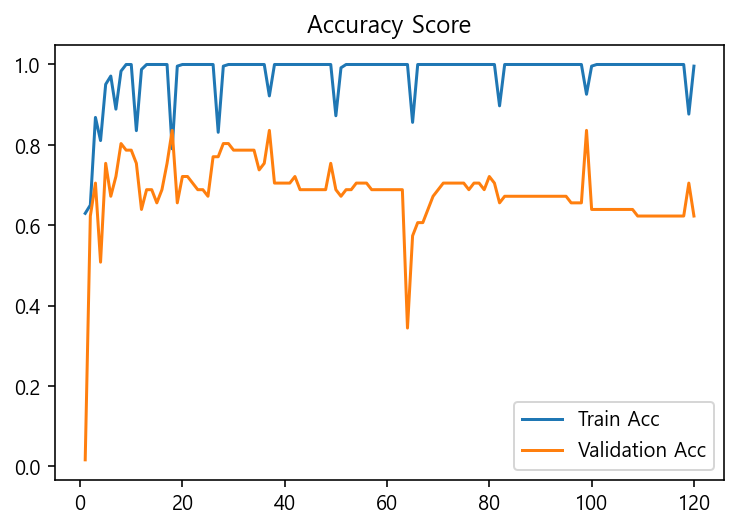

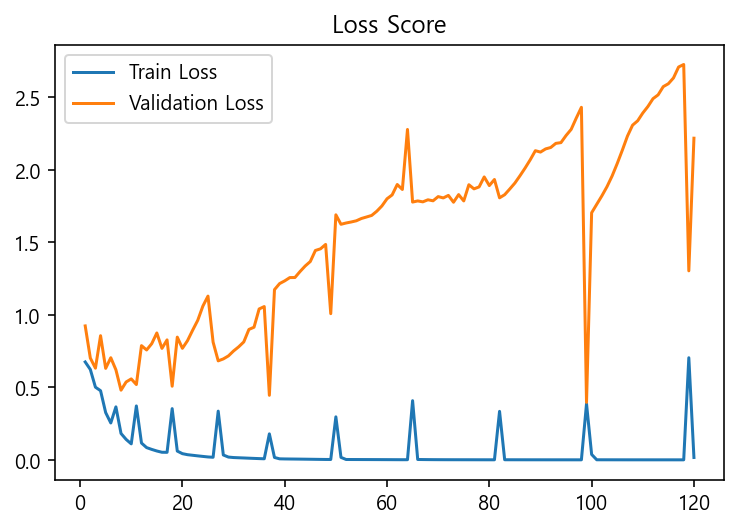

In [69]:
metrics_plot(history)

- LSTM Model 

In [70]:
model_lstm = Sequential()
model_lstm.add(layers.Embedding(1600,64, input_length=max_length))
model_lstm.add(layers.LSTM(32))
model_lstm.add(layers.Dense(2, activation='sigmoid'))

model_lstm.compile(optimizer=RMSprop(), loss='binary_crossentropy',metrics=['acc'])
model_lstm.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 60, 64)            102400    
_________________________________________________________________
lstm_5 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 66        
Total params: 114,882
Trainable params: 114,882
Non-trainable params: 0
_________________________________________________________________


In [71]:
history = model_lstm.fit(X_input, Y_matrix, 
                        epochs=40, batch_size=32, validation_split=0.2)

Epoch 1/40
8/8 [==============================] - 1s 48ms/step - loss: 0.6784 - acc: 0.6255 - val_loss: 0.8558 - val_acc: 0.0000e+00
Epoch 2/40
8/8 [==============================] - 0s 11ms/step - loss: 0.6663 - acc: 0.6255 - val_loss: 0.8903 - val_acc: 0.0000e+00
Epoch 3/40
8/8 [==============================] - 0s 11ms/step - loss: 0.6626 - acc: 0.6296 - val_loss: 0.9058 - val_acc: 0.0000e+00
Epoch 4/40
8/8 [==============================] - 0s 11ms/step - loss: 0.6600 - acc: 0.6337 - val_loss: 1.0468 - val_acc: 0.0000e+00
Epoch 5/40
8/8 [==============================] - 0s 11ms/step - loss: 0.6566 - acc: 0.6337 - val_loss: 0.8794 - val_acc: 0.0000e+00
Epoch 6/40
8/8 [==============================] - 0s 11ms/step - loss: 0.6444 - acc: 0.6337 - val_loss: 1.6075 - val_acc: 0.0000e+00
Epoch 7/40
8/8 [==============================] - 0s 11ms/step - loss: 0.5010 - acc: 0.7160 - val_loss: 0.6923 - val_acc: 0.8197
Epoch 8/40
8/8 [==============================] - 0s 11ms/step - loss: 0.

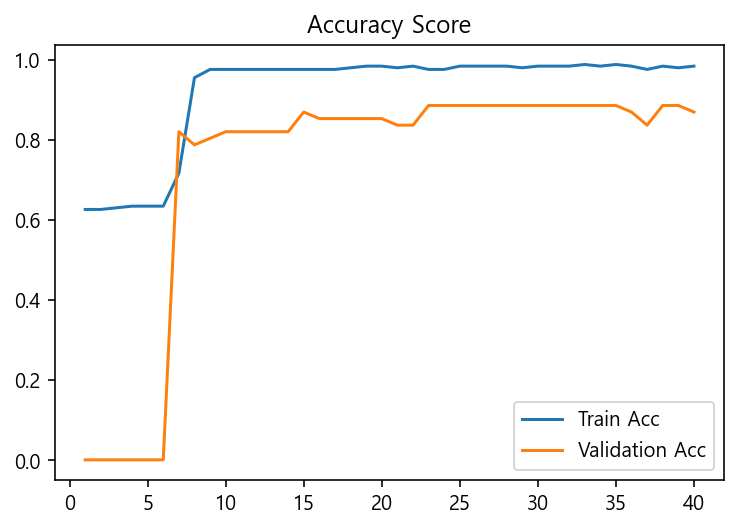

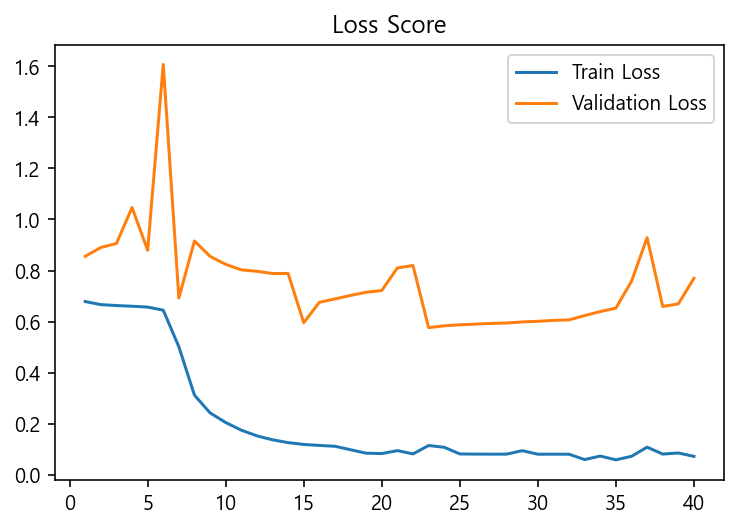

In [72]:
metrics_plot(history)

- GRU Model

In [73]:
model_gru = Sequential()
model_gru.add(layers.Embedding(1600, 64,input_length=max_length))
model_gru.add(layers.GRU(32))
model_gru.add(layers.Dense(2, activation='sigmoid'))

model_gru.compile(optimizer=RMSprop(), loss='binary_crossentropy',metrics=['acc'])
model_gru.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 60, 64)            102400    
_________________________________________________________________
gru_1 (GRU)                  (None, 32)                9408      
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 66        
Total params: 111,874
Trainable params: 111,874
Non-trainable params: 0
_________________________________________________________________


In [74]:
history = model_gru.fit(X_input, Y_matrix, 
                        epochs=40, batch_size=32, validation_split=0.2)

Epoch 1/40
8/8 [==============================] - 1s 43ms/step - loss: 0.6842 - acc: 0.6008 - val_loss: 0.7955 - val_acc: 0.0000e+00
Epoch 2/40
8/8 [==============================] - 0s 10ms/step - loss: 0.6703 - acc: 0.6255 - val_loss: 0.8582 - val_acc: 0.0000e+00
Epoch 3/40
8/8 [==============================] - 0s 10ms/step - loss: 0.6641 - acc: 0.6255 - val_loss: 0.9043 - val_acc: 0.0000e+00
Epoch 4/40
8/8 [==============================] - 0s 10ms/step - loss: 0.6612 - acc: 0.6255 - val_loss: 0.9806 - val_acc: 0.0000e+00
Epoch 5/40
8/8 [==============================] - 0s 10ms/step - loss: 0.6601 - acc: 0.6255 - val_loss: 0.9364 - val_acc: 0.0000e+00
Epoch 6/40
8/8 [==============================] - 0s 11ms/step - loss: 0.6619 - acc: 0.6255 - val_loss: 0.9888 - val_acc: 0.0000e+00
Epoch 7/40
8/8 [==============================] - 0s 11ms/step - loss: 0.6615 - acc: 0.6255 - val_loss: 0.9836 - val_acc: 0.0000e+00
Epoch 8/40
8/8 [==============================] - 0s 11ms/step - loss

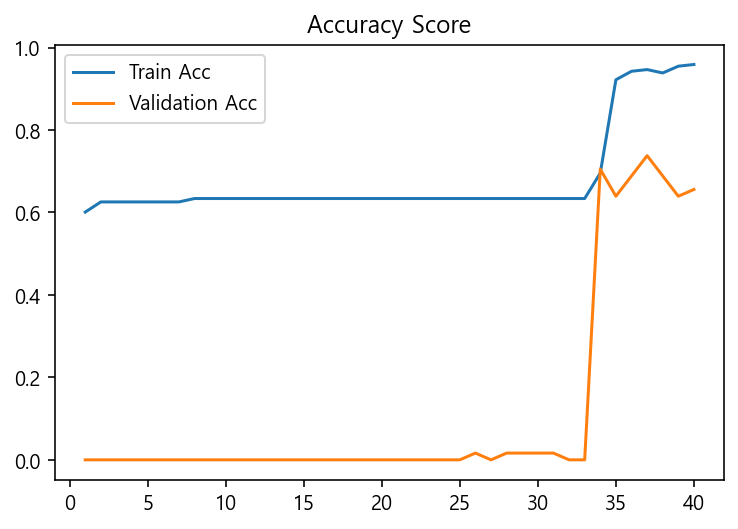

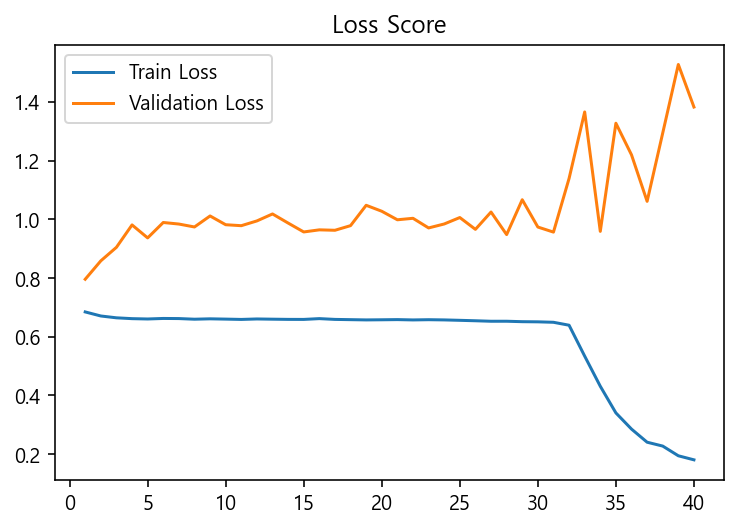

In [75]:
metrics_plot(history)

- 순환 드롭 아웃 : Overfitting 방지를 위해, Layer 내 일부 Unit들을 학습에서 Random 제외 

In [76]:
model_lstm2 = Sequential()
model_lstm2.add(layers.Embedding(1600,64, input_length=max_length))
model_lstm2.add(layers.LSTM(32, dropout=0.2))
model_lstm2.add(layers.Dense(2, activation='sigmoid'))

model_lstm2.compile(optimizer=RMSprop(), loss='binary_crossentropy', metrics=['acc'])
model_lstm2.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 60, 64)            102400    
_________________________________________________________________
lstm_6 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dense_10 (Dense)             (None, 2)                 66        
Total params: 114,882
Trainable params: 114,882
Non-trainable params: 0
_________________________________________________________________


In [77]:
history = model_lstm2.fit(X_input, Y_matrix, 
                        epochs=40, batch_size=32, validation_split=0.2)

Epoch 1/40
8/8 [==============================] - 2s 49ms/step - loss: 0.6815 - acc: 0.6296 - val_loss: 0.8140 - val_acc: 0.0000e+00
Epoch 2/40
8/8 [==============================] - 0s 11ms/step - loss: 0.6694 - acc: 0.6255 - val_loss: 0.8679 - val_acc: 0.0000e+00
Epoch 3/40
8/8 [==============================] - 0s 11ms/step - loss: 0.6632 - acc: 0.6255 - val_loss: 0.9074 - val_acc: 0.0000e+00
Epoch 4/40
8/8 [==============================] - 0s 11ms/step - loss: 0.6612 - acc: 0.6255 - val_loss: 1.0092 - val_acc: 0.0000e+00
Epoch 5/40
8/8 [==============================] - 0s 11ms/step - loss: 0.6594 - acc: 0.6296 - val_loss: 0.9097 - val_acc: 0.0000e+00
Epoch 6/40
8/8 [==============================] - 0s 11ms/step - loss: 0.6625 - acc: 0.6337 - val_loss: 1.0051 - val_acc: 0.0000e+00
Epoch 7/40
8/8 [==============================] - 0s 12ms/step - loss: 0.6630 - acc: 0.6337 - val_loss: 0.9776 - val_acc: 0.0000e+00
Epoch 8/40
8/8 [==============================] - 0s 11ms/step - loss

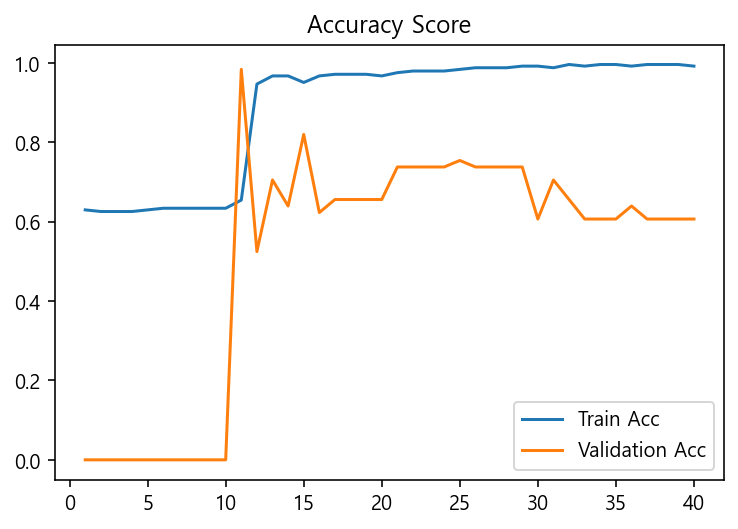

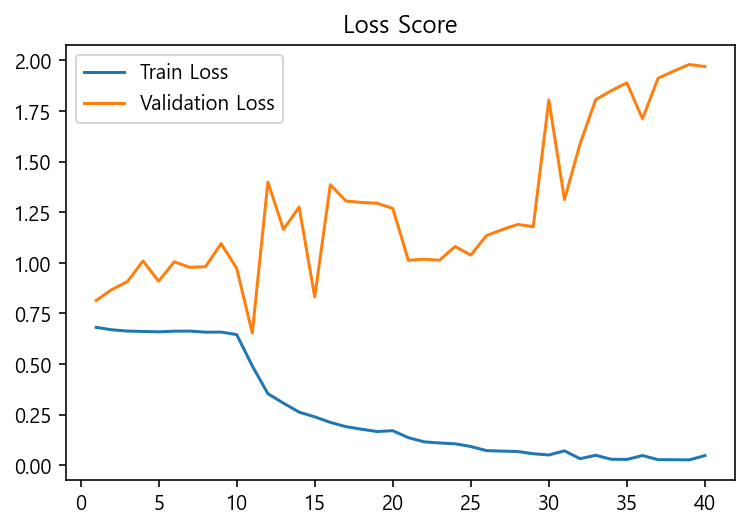

In [78]:
metrics_plot(history)

- Stacking Recurrent Layer : Network 용량을 늘려 성능을 향상시키는 작업 

In [79]:
model_lstm3 = Sequential()
model_lstm3.add(layers.Embedding(1600,64, input_length=max_length))
model_lstm3.add(layers.LSTM(32, dropout=0.1, return_sequences=True))
model_lstm3.add(layers.LSTM(32, dropout=0.1))
model_lstm3.add(layers.Dense(2, activation='sigmoid'))

model_lstm3.compile(optimizer=RMSprop(), loss='binary_crossentropy', metrics=['acc'])
model_lstm3.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 60, 64)            102400    
_________________________________________________________________
lstm_7 (LSTM)                (None, 60, 32)            12416     
_________________________________________________________________
lstm_8 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 66        
Total params: 123,202
Trainable params: 123,202
Non-trainable params: 0
_________________________________________________________________


In [80]:
history = model_lstm3.fit(X_input, Y_matrix, 
                        epochs=40, batch_size=32, validation_split=0.2)

Epoch 1/40
8/8 [==============================] - 3s 79ms/step - loss: 0.6788 - acc: 0.6214 - val_loss: 0.7994 - val_acc: 0.0000e+00
Epoch 2/40
8/8 [==============================] - 0s 15ms/step - loss: 0.6715 - acc: 0.6255 - val_loss: 0.8590 - val_acc: 0.0000e+00
Epoch 3/40
8/8 [==============================] - 0s 15ms/step - loss: 0.6642 - acc: 0.6255 - val_loss: 0.8786 - val_acc: 0.0000e+00
Epoch 4/40
8/8 [==============================] - 0s 15ms/step - loss: 0.6598 - acc: 0.6255 - val_loss: 1.1015 - val_acc: 0.0000e+00
Epoch 5/40
8/8 [==============================] - 0s 15ms/step - loss: 0.6506 - acc: 0.6255 - val_loss: 0.8104 - val_acc: 0.0000e+00
Epoch 6/40
8/8 [==============================] - 0s 15ms/step - loss: 0.4628 - acc: 0.8025 - val_loss: 1.5383 - val_acc: 0.3770
Epoch 7/40
8/8 [==============================] - 0s 15ms/step - loss: 0.2775 - acc: 0.9506 - val_loss: 1.0828 - val_acc: 0.6721
Epoch 8/40
8/8 [==============================] - 0s 15ms/step - loss: 0.1908

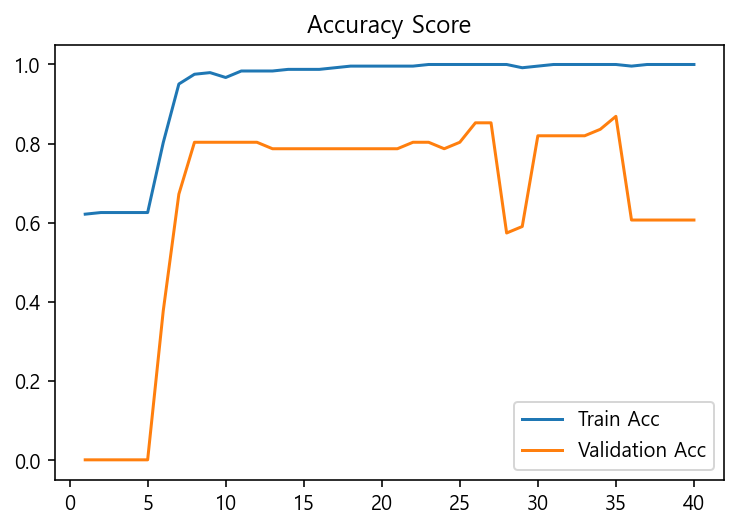

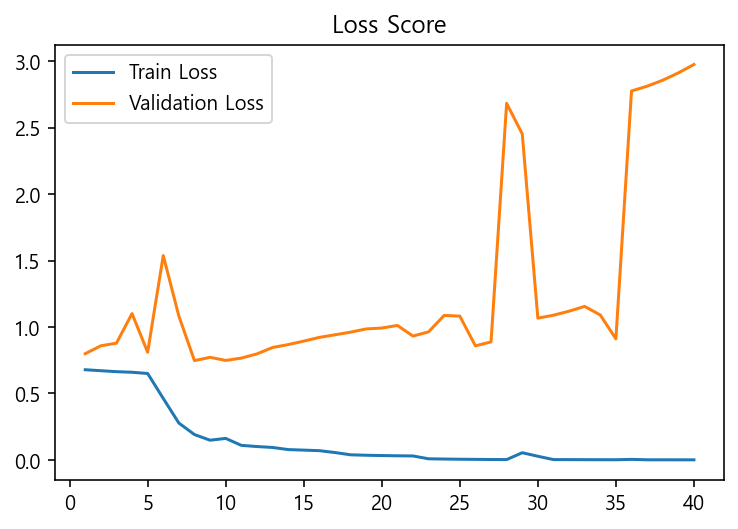

In [81]:
metrics_plot(history)

- 양방향 LSTM 
    - Sequence의 방향을 바꿔 Layer에 Vector를 한번 더 통과시킨다. 
    - [1,2,3,2,4,5,3] -> Layer -> Output
    - [3,5,4,2,3,2,1] -> Layer -> Output

In [82]:
model_lstm4 = Sequential()
model_lstm4.add(layers.Embedding(1600, 64, input_length=max_length))
model_lstm4.add(layers.Bidirectional(layers.LSTM(32)))
model_lstm4.add(layers.Dense(2, activation='sigmoid'))

model_lstm4.compile(optimizer=RMSprop(), loss='binary_crossentropy', metrics=['acc'])
model_lstm4.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 60, 64)            102400    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                24832     
_________________________________________________________________
dense_12 (Dense)             (None, 2)                 130       
Total params: 127,362
Trainable params: 127,362
Non-trainable params: 0
_________________________________________________________________


In [83]:
history = model_lstm4.fit(X_input, Y_matrix, 
                        epochs=40, batch_size=32, validation_split=0.2)

Epoch 1/40
8/8 [==============================] - 3s 79ms/step - loss: 0.6763 - acc: 0.6173 - val_loss: 0.8379 - val_acc: 0.0000e+00
Epoch 2/40
8/8 [==============================] - 0s 15ms/step - loss: 0.6385 - acc: 0.6255 - val_loss: 0.8784 - val_acc: 0.0000e+00
Epoch 3/40
8/8 [==============================] - 0s 15ms/step - loss: 0.5711 - acc: 0.6296 - val_loss: 0.7995 - val_acc: 0.0328
Epoch 4/40
8/8 [==============================] - 0s 15ms/step - loss: 0.4858 - acc: 0.7284 - val_loss: 0.8727 - val_acc: 0.0328
Epoch 5/40
8/8 [==============================] - 0s 14ms/step - loss: 0.3975 - acc: 0.8395 - val_loss: 1.2786 - val_acc: 0.0328
Epoch 6/40
8/8 [==============================] - 0s 15ms/step - loss: 0.3413 - acc: 0.9506 - val_loss: 2.8029 - val_acc: 0.0000e+00
Epoch 7/40
8/8 [==============================] - 0s 15ms/step - loss: 0.4119 - acc: 0.9424 - val_loss: 0.7919 - val_acc: 0.5738
Epoch 8/40
8/8 [==============================] - 0s 15ms/step - loss: 0.2536 - acc: 

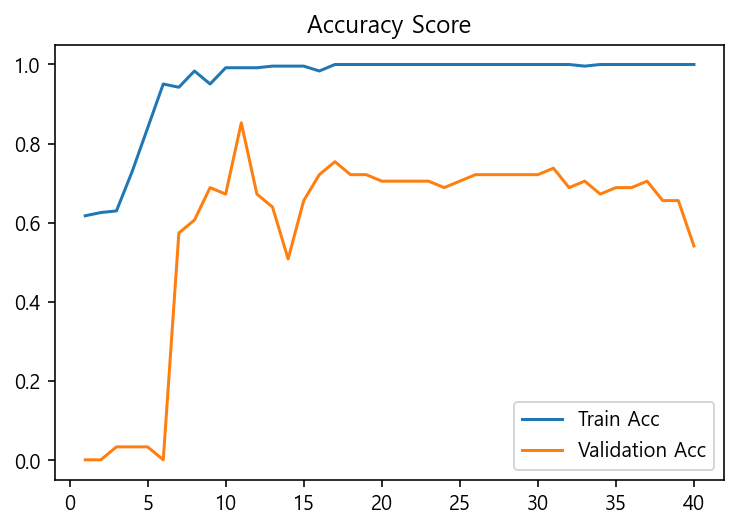

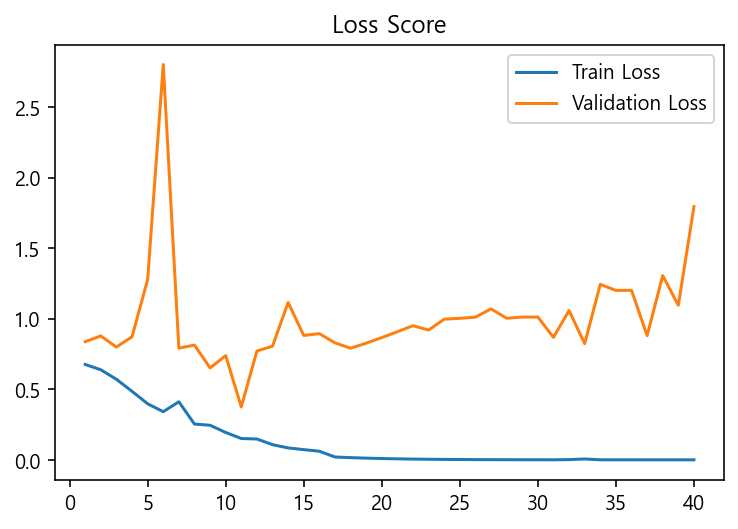

In [84]:
metrics_plot(history)

- CNN Model Conv-1D

In [85]:
model_cnn = Sequential()
model_cnn.add(layers.Embedding(1600,64, input_length=max_length))
model_cnn.add(layers.Conv1D(32, 7, activation='relu'))
model_cnn.add(layers.MaxPooling1D(5))
model_cnn.add(layers.Conv1D(32, 7, activation='relu'))
model_cnn.add(layers.GlobalMaxPool1D())
model_cnn.add(layers.Dense(2, activation='sigmoid'))

model_cnn.compile(optimizer=RMSprop(), loss='binary_crossentropy', metrics=['acc'])
model_cnn.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, 60, 64)            102400    
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 54, 32)            14368     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 10, 32)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 4, 32)             7200      
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 32)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 2)                 66        
Total params: 124,034
Trainable params: 124,034
Non-trainable params: 0
_______________________________________________

In [86]:
history = model_cnn.fit(X_input, Y_matrix, 
                        epochs=40, batch_size=32, validation_split=0.2)

Epoch 1/40
8/8 [==============================] - 1s 23ms/step - loss: 0.6810 - acc: 0.5926 - val_loss: 0.8392 - val_acc: 0.0000e+00
Epoch 2/40
8/8 [==============================] - 0s 11ms/step - loss: 0.6559 - acc: 0.6255 - val_loss: 0.8804 - val_acc: 0.0000e+00
Epoch 3/40
8/8 [==============================] - 0s 10ms/step - loss: 0.6365 - acc: 0.6543 - val_loss: 0.8724 - val_acc: 0.0000e+00
Epoch 4/40
8/8 [==============================] - 0s 10ms/step - loss: 0.6069 - acc: 0.6749 - val_loss: 0.9976 - val_acc: 0.0000e+00
Epoch 5/40
8/8 [==============================] - 0s 11ms/step - loss: 0.5569 - acc: 0.7078 - val_loss: 0.7996 - val_acc: 0.1639
Epoch 6/40
8/8 [==============================] - 0s 10ms/step - loss: 0.4794 - acc: 0.8272 - val_loss: 1.0042 - val_acc: 0.0656
Epoch 7/40
8/8 [==============================] - 0s 10ms/step - loss: 0.3885 - acc: 0.8683 - val_loss: 0.8022 - val_acc: 0.3115
Epoch 8/40
8/8 [==============================] - 0s 11ms/step - loss: 0.2764 - a

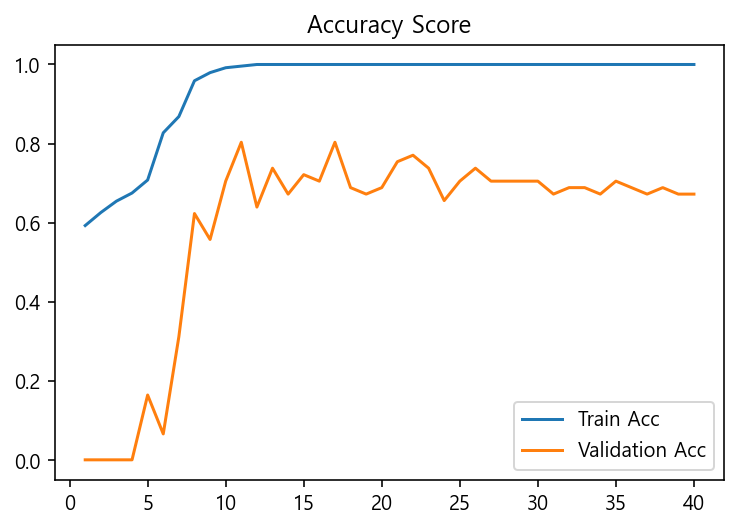

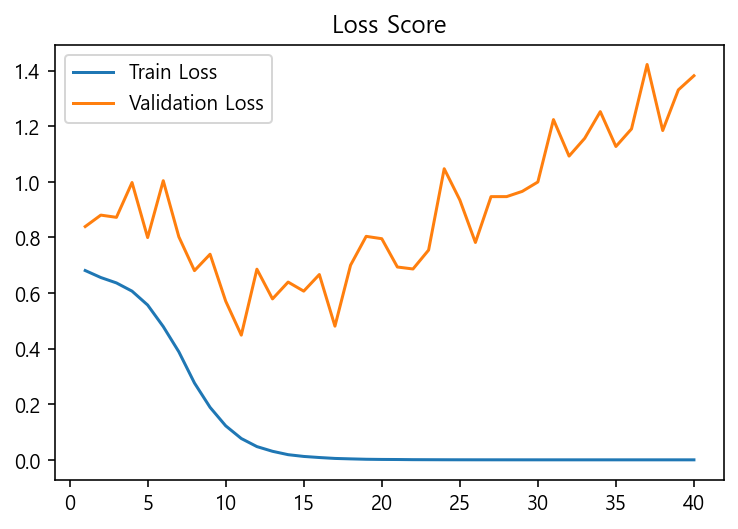

In [87]:
metrics_plot(history)

- Test Set 데이터 분류 실시 

In [88]:
# 데이터 불러오기 
df_test = pd.read_csv('company_Test_data.csv')
print(df_test.shape)
df_test.head(2)

(152, 2)


,Unnamed: 0,한줄평
0,0,"""무섭도록 빠른 속도로 성장중인 대한민국 스타트업의 상징!\n회사도 성장하고 그 안..."
1,1,"""체계적인 업무분담으로 자율성을 강조하며 사내분위기로 실무를 극대화할 수 있는 좋은..."


In [89]:
# 특수문자처리 / 불용어 처리 
X_test_clean = stopword_function(df_test['한줄평'])

In [90]:
# Text to Sequence / Padding 
X_test_sequence = model_token.texts_to_sequences(X_test_clean)
X_input_test    = pad_sequences(X_test_sequence,maxlen=max_length, padding='post')

In [91]:
# 새로운 값을 Model로 분류  
df_test['기업성장여부(분류)']= model_lstm.predict_classes(X_input_test, batch_size=32)

C:\Users\DMC CONET\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [92]:
# 분류된 결과를 라벨 처리 
df_test['기업성장여부']= df_test['기업성장여부(분류)'].replace({1:'성장',0:'정체'})

<AxesSubplot:xlabel='기업성장여부', ylabel='count'>

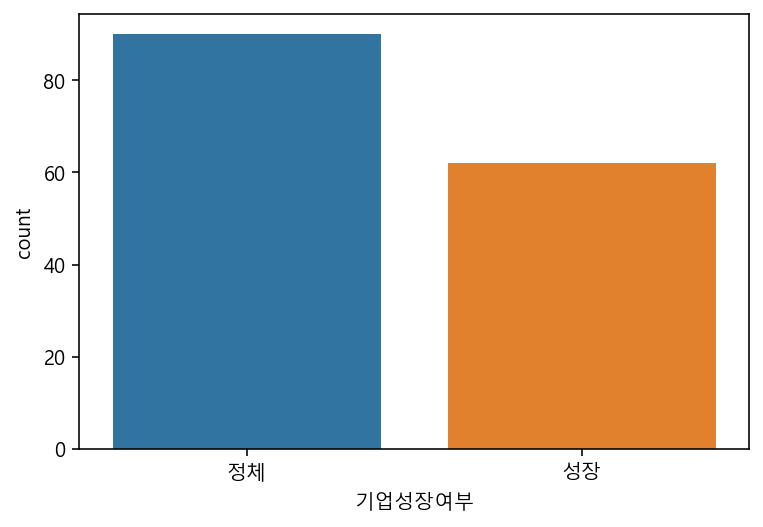

In [93]:
sns.countplot(data=df_test, x='기업성장여부')

In [94]:
df_test

,Unnamed: 0,한줄평,기업성장여부(분류),기업성장여부
0,0,"""무섭도록 빠른 속도로 성장중인 대한민국 스타트업의 상징!\n회사도 성장하고 그 안...",0,정체
1,1,"""체계적인 업무분담으로 자율성을 강조하며 사내분위기로 실무를 극대화할 수 있는 좋은...",0,정체
2,2,"""개발자가 대우받으며 일할 수 있는곳, 워라밸 좋음""",0,정체
3,3,"""일하기 좋은 회사. 누구라도 잘 알고 있는 회사인만큼 실제로도 매우 만족스러운 회...",0,정체
4,4,"""무섭도록 빠른 속도로 성장중인 대한민국 스타트업의 상징!\n회사도 성장하고 그 안...",0,정체
...,...,...,...,...
147,147,"""조직문화가 최대 강점! 구성원 모두가 일도 잘하지만 인격적으로도 우수하신 분들이 많음""",0,정체
148,148,"""신입직으로는 사실 불행일 수도 있습니다. 이런 회사가 흔치 않으니까요.""",0,정체
149,149,"""자유롭고 편안한 분위기 미래가 보이는 곳""",1,성장
150,150,"BEST\n""IT업계치고 야근없는 회사가 있을까. 그래도 매우 만족하는 이유는 회사...",1,성장


# 텍스트 유사도 

- 텍스트 데이터 간 얼마나 유사한지 표현하는 방식 
- 문장의 구조는 다르나 의미가 같은 경우 / 동의어를 사용해 문장을 구성한 경우 
- 같은 단어의 갯수를 사용해 유사도를 측정하는 방법 (형태로 나누어 비교하는 방식)

In [95]:
!pip install --user networkx

In [96]:
!pip install --user apyori

In [97]:
import networkx as nx 
from  apyori import apriori

from sklearn.feature_extraction.text import TfidfVectorizer

In [98]:
Text_data = stopword_function(df1['한줄평'])

In [99]:
model_TFIDF = TfidfVectorizer()
model_TFIDF.fit_transform(df1['한줄평'])

<304x2828 sparse matrix of type '<class 'numpy.float64'>'
	with 4841 stored elements in Compressed Sparse Row format>

In [100]:
# 유사도 계산하기 위한 벡터 
idf_value = model_TFIDF.idf_

In [101]:
pd.DataFrame({'단어':model_TFIDF.get_feature_names(), '단어벡터':idf_value})

,단어,단어벡터
0,000원,5.334017
1,1000명이,6.027165
2,13시,6.027165
3,13시출근,6.027165
4,1도,5.621699
...,...,...
2823,힘듦,5.334017
2824,힘듬,5.621699
2825,힘듭니다,6.027165
2826,힘쓰는,5.621699


-  유사도 계산 방법 

- 자카드 유사도 : 두 문장을 각각 단어의 집합으로 만든 다음, 각각의 집합의 원소들을 이용해 유사도를 측정 
    - 두 집합 교집합 -> 공통된 단어 / 두 집합 교집합 -> 전체 단어  
    - 두 집단의 교집합을 두 집단의 합집합으로 나눈다 
    
- 유클리디언 유사도 : 벡터간의 거리를 유클리드 기하를 바탕으로 계산하여, 단어간의 거리가 얼마나 떨어져 있는지 계산 (L2 Distance)

- 맨하탄 유사도 : 격자 구조 좌표계에서 최소로 움직일 수 있는 경로 (최단경로) 계산 

- 코사인 유사도 : 두 개의 단어 벡터값에서 코사인 각도를 구해 유사도를 계산 
    - 방향성이 정의가 됨 / 다른 유사도를 측정하는 방식에 비해 성능이 좋다 

In [102]:
result = list(apriori(Text_data, min_support =0.02))

In [103]:
df_support = pd.DataFrame(result)

In [112]:
df_support

,items,support,ordered_statistics,word_count
0,(\n),0.230263,"[((), (\n), 0.23026315789473684, 1.0)]",1
1,(-),0.023026,"[((), (-), 0.023026315789473683, 1.0)]",1
2,(가능),0.026316,"[((), (가능), 0.02631578947368421, 1.0)]",1
3,(가능성),0.023026,"[((), (가능성), 0.023026315789473683, 1.0)]",1
4,(가능하다),0.026316,"[((), (가능하다), 0.02631578947368421, 1.0)]",1
...,...,...,...,...
343,"(구입, 무제한, 비, 도서)",0.036184,"[((), (구입, 무제한, 비, 도서), 0.03618421052631579, 1...",4
344,"(구입, 연차, 비, 도서)",0.023026,"[((), (구입, 연차, 비, 도서), 0.023026315789473683, 1...",4
345,"(구입, 지원, 비, 도서)",0.026316,"[((), (구입, 지원, 비, 도서), 0.02631578947368421, 1....",4
346,"(구입, 출근, 월요일, 도서)",0.023026,"[((), (구입, 출근, 월요일, 도서), 0.023026315789473683,...",4


In [104]:
# items 내 단어 수 
df_support['word_count'] = df_support['items'].apply(lambda x : len(x))

In [105]:
cond1     = (df_support['word_count']==2)
df_result = df_support.loc[cond1]

In [106]:
df_result

,items,support,ordered_statistics,word_count
151,"(\n, 근무)",0.026316,"[((), (\n, 근무), 0.02631578947368421, 1.0), ((\...",2
152,"(기업, \n)",0.032895,"[((), (기업, \n), 0.03289473684210526, 1.0), ((\...",2
153,"(\n, 너무)",0.026316,"[((), (\n, 너무), 0.02631578947368421, 1.0), ((\...",2
154,"(\n, 도서)",0.026316,"[((), (\n, 도서), 0.02631578947368421, 1.0), ((\...",2
155,"(\n, 들다)",0.023026,"[((), (\n, 들다), 0.023026315789473683, 1.0), ((...",2
...,...,...,...,...
302,"(크다, 회사)",0.023026,"[((), (크다, 회사), 0.023026315789473683, 1.0), ((...",2
303,"(회사, 팀)",0.026316,"[((), (회사, 팀), 0.02631578947368421, 1.0), ((팀)...",2
304,"(한, 회사)",0.023026,"[((), (한, 회사), 0.023026315789473683, 1.0), ((한...",2
305,"(회사, 함)",0.023026,"[((), (회사, 함), 0.023026315789473683, 1.0), ((함...",2


- 유사도/지지도를 바탕으로 계산한 네트워크 분석 

In [107]:
graph_model = nx.Graph()
p_rank      = nx.pagerank(graph_model)
graph_model.add_edges_from(df_result['items'])

In [108]:
p_graph_shape = nx.kamada_kawai_layout(graph_model)

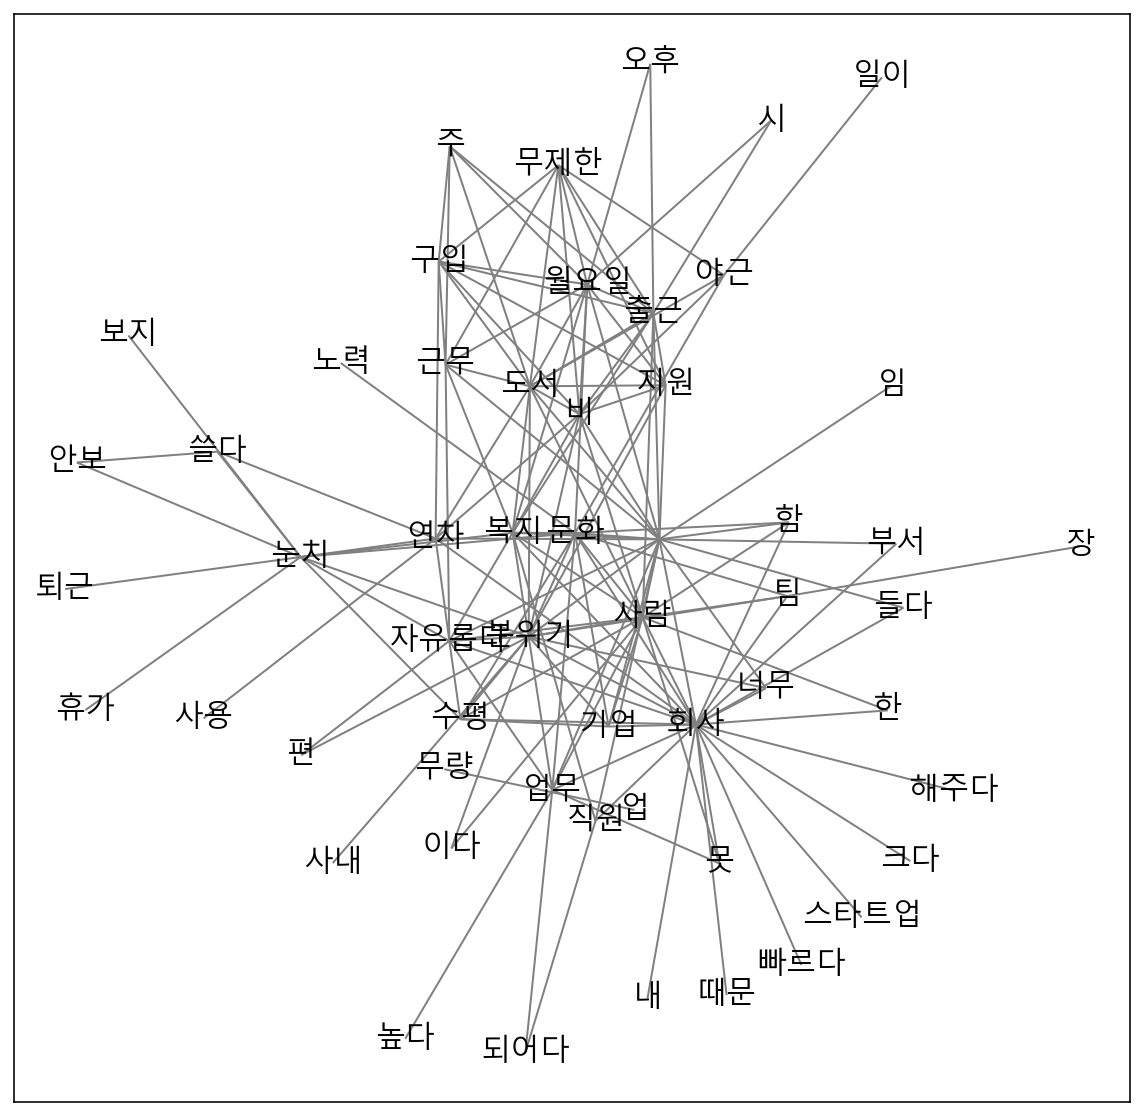

In [109]:
plt.figure(figsize=[10,10])
nx.draw_networkx(graph_model, font_family='Malgun Gothic', font_size= 15,
                pos=p_graph_shape , edge_color='0.5', node_color= list(p_rank.values()))

In [110]:
p_graph_shape = nx.shell_layout(graph_model)

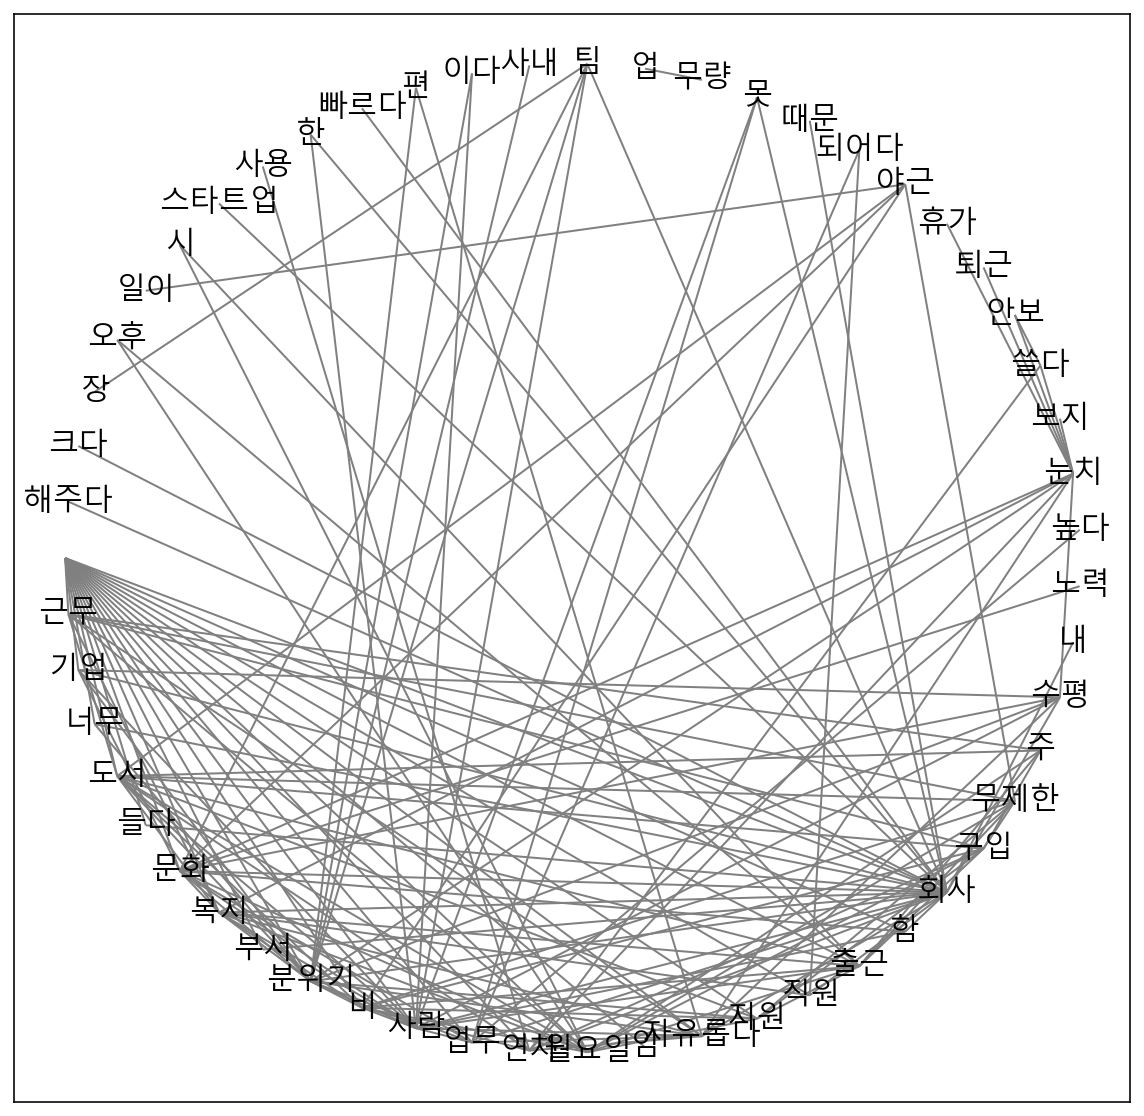

In [111]:
plt.figure(figsize=[10,10])
nx.draw_networkx(graph_model, font_family='Malgun Gothic', font_size= 15,
                pos=p_graph_shape , edge_color='0.5', node_color= list(p_rank.values()))

In [113]:
! pip install --user dash

  Using cached dash-1.21.0.tar.gz (1.1 MB)
  Using cached Flask_Compress-1.10.1-py3-none-any.whl (7.9 kB)
  Using cached plotly-5.1.0-py2.py3-none-any.whl (20.6 MB)
  Using cached dash_core_components-1.17.1.tar.gz (3.7 MB)
  Using cached dash_html_components-1.1.4.tar.gz (83 kB)
  Using cached dash_table-4.12.0.tar.gz (1.8 MB)
  Using cached Brotli-1.0.9-cp38-cp38-win_amd64.whl (365 kB)
  Using cached tenacity-8.0.1-py3-none-any.whl (24 kB)
  Created wheel for dash: filename=dash-1.21.0-py3-none-any.whl size=1100477 sha256=a25d57bd964807d6bf909beb021c56f31f85cd14f758c0463f5587ba3b151dc2
  Stored in directory: c:\users\dmc conet\appdata\local\pip\cache\wheels\56\e4\21\8a1190a7c31f3aa3f8834b05126ded8bf105b8fd11fad1806e
  Created wheel for dash-core-components: filename=dash_core_components-1.17.1-py3-none-any.whl size=3738982 sha256=980f94661b351ece1fc42039b383293a30e082a2ef91215a23ab6229af03c553
  Stored in directory: c:\users\dmc conet\appdata\local\pip\cache\wheels\08\ae\6a\0f4a0ee8f

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [114]:
import dash 
import plotly.express as px 


In [115]:
df1 = pd.read_csv('Data01.csv', encoding= 'cp949')
print(df1.shape)
df1.head()

(51304, 6)


,id,product,amount,credit rating,cancellation,age
0,66758234,K1,96900,9.0,정상,43.0
1,66755948,K1,102900,2.0,정상,62.0
2,66756657,K1,96900,8.0,정상,60.0
3,66423450,K1,66900,5.0,정상,60.0
4,66423204,K1,66900,8.0,해약,51.0


In [116]:
df1['product'].value_counts()

K1    39134
K2     8995
K3     2082
K5      645
K4      327
K6      120
Name: product, dtype: int64

<AxesSubplot:xlabel='product', ylabel='amount'>

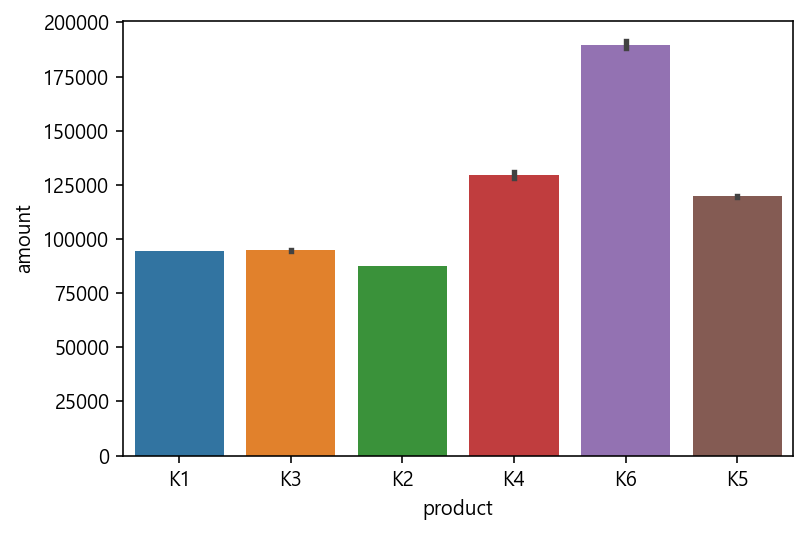

In [117]:
sns.barplot(data=df1, x ='product', y = 'amount')

In [121]:
df2 = pd.pivot_table(index = ['product','cancellation'], values= 'amount', aggfunc = 'sum',data = df1).reset_index()
fig = px.bar(df2, x = 'product', y = 'amount', color= 'cancellation')
fig.show()

In [122]:
df2 

,product,cancellation,amount
0,K1,정상,3629908317
1,K1,해약,63725688
2,K2,정상,782315790
3,K2,해약,5141700
4,K3,정상,196224960
5,K3,해약,957000
6,K4,정상,41904900
7,K4,해약,423600
8,K5,정상,76752900
9,K5,해약,483600
